In [109]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict the house pricing

# Load the data

In [110]:
#input
df = pd.read_csv('data/house_pricing.csv')
print(df.columns)
print(df.shape)
df.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'walking_score',
       'transit_score', 'bike_score', 'median_income', 'mean_income',
       'population'],
      dtype='object')
(21165, 27)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,walking_score,transit_score,bike_score,median_income,mean_income,population
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,47.5112,-122.257,1340,5650,24,46.0,22.0,55777.0,65498.0,24092
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,47.7210,-122.319,1690,7639,67,59.0,64.0,47910.0,60487.0,30826
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,47.7379,-122.233,2720,8062,14,36.0,NaN,86310.0,100546.0,20419
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,47.5208,-122.393,1360,5000,74,48.0,51.0,77761.0,95355.0,14770
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,47.6168,-122.045,1800,7503,9,0.0,NaN,134159.0,157543.0,25748


# Feature Engineering 

In [111]:
# TODO: create 2 new features

# for one hot encoding
df_zipcode = pd.get_dummies(df['zipcode']) # generates matrix of 0
df = pd.concat([df, df_zipcode], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
# TODO: select the features and the target
X_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'waterfront', 'view'] + list(df_zipcode.columns) # adding list of zipcodes to df column headers
y_column = ['price']

# Model Training

In [113]:
# TODO: split the data: 80% for training and 20% for test

# get length of dataframes to ration threshold of dataset for model training
threshold = 0.8
absolute_threshold = int(df.shape[0] * threshold)

print('Train')
X_train = df.ix[:absolute_threshold, X_columns]
y_train = df.ix[:absolute_threshold, y_column]
print(X_train)
print (y_train)

print('Test')
X_test = df.ix[absolute_threshold+1:, X_columns] # +1 to account for overlap between train and test sets
y_test = df.ix[absolute_threshold+1:, y_column]
print(X_test)
print (y_test)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

Train
       bedrooms  bathrooms  sqft_living  sqft_lot  condition  grade  \
0             3       1.00         1180      5650          3      7   
1             3       2.25         2570      7242          3      7   
2             2       1.00          770     10000          3      6   
3             4       3.00         1960      5000          5      7   
4             3       2.00         1680      8080          3      8   
5             4       4.50         5420    101930          3     11   
6             3       2.25         1715      6819          3      7   
7             3       1.50         1060      9711          3      7   
8             3       1.00         1780      7470          3      7   
9             3       2.50         1890      6560          3      7   
10            3       2.50         3560      9796          3      8   
11            2       1.00         1160      6000          4      7   
12            3       1.00         1430     19901          4      7   


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWa

In [114]:
# TODO: train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [115]:
# identigy the feature importance
# importance = []
# for i in range(len(X_columns)):
#     importance.append([X_columns[i], model.feature_importances_[i]])
# pd.DataFrame(importance).sort_values(by=1, ascending=False)

# Model Evaluation

In [116]:
# TODO: evaluate the model using the Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE', mean_absolute_error(y_test, y_pred))

MAE 85399.71724437


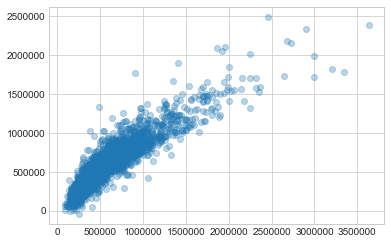

In [117]:
# plot the results
plt.scatter(y_test, y_pred, alpha=0.3)
plt.show()